<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 2*

# 📝 Assignment
---

# 랜덤포레스트(Random Forests)

### 1) 캐글 대회를 이어서 진행합니다. EDA, 데이터 전처리 부분을 업데이트 하세요.
- EDA는 항상 완벽할 수 없지요 한 주간 계속 같은 데이터로 과제를 진행하므로 부족한 부분을 추가하거나 논하세요.
- (지금은 feature engineering에 너무 시간을 들이지 마세요!)
- Ordinal Encoding을 적용해 보세요.
- **(Urclass Quiz) 다음 특성들 중에 순서를 고려한 Ordinal Encoding이 필요해 보이는 특성을 고르세요.**
    1. opinion_h1n1_vacc_effective
    2. state
    3. marital
    4. employment_occupation


데이터 케글에서 불러오기

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c prediction-of-h1n1-vaccination

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

target = 'vacc_h1n1_f'

train = pd.merge(pd.read_csv('/content/train.csv.zip'), 
                 pd.read_csv('/content/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('/content/test.csv.zip')

In [7]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

기준모델(전과 동일)

In [9]:
from sklearn.metrics import accuracy_score

major = train[target].mode()[0]
pred = [major] * len(train[target])
print("training accuracy: ", accuracy_score(train[target], pred))

training accuracy:  0.7609346736648578


In [10]:
def engeneer(df):
    # 높은 카디널리티를 가지는 특성을 제거
    selected_cols = df.select_dtypes(include = ['number', 'object'])
    labels = selected_cols.nunique()
    selected_feature = labels[labels <= 25].index.tolist()
    df = df[selected_feature]

    dels = [col for col in df.columns if ('seas' in col or 'seasonal' in col)] # seas 포함하는 컬럼 제거
    df.drop(columns = dels, inplace = True)

    return df

In [13]:
train = engeneer(train)
val = engeneer(val)
test = engeneer(test)

In [14]:
features = train.drop(columns = [target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

### 2) 랜덤포레스트 모델을 적용한 후의 결과를 캐글에 제출하세요.
- 랜덤포레스트를 적용하고 성능이 오히려 떨어졌을 수도 있습니다! 만약 그렇다면 이유를 본인 논리로 분석해 보세요.
- **(Urclass Quiz) 캐글 Leaderboard의 본인 Score를 제출하세요.**

In [ ]:
!pip install category_encoders

In [16]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, n_estimators = 100, oob_score=True))

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

검증 정확도 0.8193571343850077


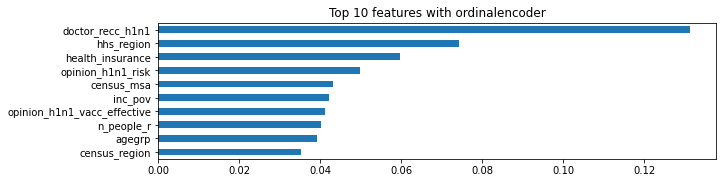

In [18]:
import matplotlib.pyplot as plt

# 특성 중요도(ordinal)
n = 10

rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances.sort_values()[-n:].plot.barh();

In [19]:
rf_ord = pipe.named_steps['ordinalencoder']

In [20]:
submission = pd.read_csv('/content/submission.csv')
submission[target] = pipe.predict(X_test)
submission.to_csv('/content/submission_result2.csv', index = False)

## 🔥 도전과제(Github - Discussion)

### 3) 수업에 사용하지 않은 다른 종류의 [category_encoders](http://contrib.scikit-learn.org/category_encoders/)을 2개 이상 사용해 결과를 공유해 보시고, 다음 질문에 대해 서로 논의해 보세요. 

- 사용하신 encoder는 각각 어떤 장단점을 갖고 있으며, 어떤 상황에서 사용하면 좋을까요? 

### 4) 왜 트리모델에서는 ordinal encoding을 주로 사용하며 (one-hot encoding대신), 범주형 자료를 ordinal encoding으로 사용해도 되는 이유는 무엇이라고 생각하시는지 논의해 보세요


## 참고자료

- [Random Forests for Complete Beginners](https://victorzhou.com/blog/intro-to-random-forests/)